# A Study of Potential Influencing Factors on Canadian Immigrants.
### CSCI 6405 -- Data Mining Project, Dalhousie University.
### By Hongwei Zhang, January - April 2023.

## Experiment 2: Study the reasons for attracting immigrants to Canada based on Canadian economic and social indicators.
### Data mining methods: Decision Tree, Association Rule Mining
### Datasets used: Historical statistics on net migration in Canada (1960-2021), and Canadian economic and social indicators.

In [110]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from mlxtend.frequent_patterns import apriori, association_rules

In [111]:
# Generate a dataset of the number of immigrants and related indicators for Canada from 1960-2021.
year = np.arange(1960, 2022)

nm = pd.read_csv("Datasets/netmigration.csv", skiprows=39, nrows=1, usecols=range(4, 66)).to_numpy().flatten()
cgdp = pd.read_csv("Datasets/gdp.csv", skiprows=39, nrows=1, usecols=range(4, 66)).to_numpy().flatten()
cle = pd.read_csv("Datasets/life.csv", skiprows=39, nrows=1, usecols=range(4, 66)).to_numpy().flatten()
cif = pd.read_csv("Datasets/inflation.csv", skiprows=39, nrows=1, usecols=range(4, 66)).to_numpy().flatten()
cem = pd.read_csv("Datasets/employment.csv", skiprows=39, nrows=1, usecols=range(4, 66)).to_numpy().flatten()
cfm = pd.read_csv("Datasets/female.csv", skiprows=39, nrows=1, usecols=range(4, 66)).to_numpy().flatten()
che = pd.read_csv("Datasets/health.csv", skiprows=39, nrows=1, usecols=range(4, 66)).to_numpy().flatten()
cedu = pd.read_csv("Datasets/education.csv", skiprows=39, nrows=1, usecols=range(4, 66)).to_numpy().flatten()

dataset = pd.DataFrame({'Year': year, 'Immigrants':nm, 'GDP':cgdp, 'LE':cle, 'IF':cif, 'EM':cem, 'FM':cfm, 'HE': che, 'EDU':cedu})
dataset.head()

,Year,Immigrants,GDP,LE,IF,EM,FM,HE,EDU
0,1960,44527,2259.250511,71.133171,1.358696,NaN,NaN,NaN,NaN
1,1961,24186,2240.433039,71.346098,1.018767,NaN,NaN,NaN,NaN
2,1962,26210,2268.585346,71.367073,1.061571,NaN,NaN,NaN,NaN
3,1963,40913,2374.498448,71.380732,1.628151,NaN,NaN,NaN,NaN
4,1964,58965,2555.111146,71.776341,1.912145,NaN,NaN,NaN,NaN


In [112]:
# Imputation of missing data.
dataset = KNNImputer(weights='distance').fit_transform(dataset)

In [113]:
dataset = pd.DataFrame(dataset, columns=['Year', 'Immigrants', 'GDP', 'LE', 'IF', 'EM', 'FM', 'HE', 'EDU'])
dataset_full = dataset.copy()
dataset = dataset.drop(['Year'], axis=1)
dataset.head()

,Immigrants,GDP,LE,IF,EM,FM,HE,EDU
0,44527.0,2259.250511,71.133171,1.358696,58.821529,57.970115,9.176867,6.727497
1,24186.0,2240.433039,71.346098,1.018767,58.820562,57.969128,9.178433,6.730985
2,26210.0,2268.585346,71.367073,1.061571,58.820648,57.969213,9.178306,6.736591
3,40913.0,2374.498448,71.380732,1.628151,58.821346,57.969922,9.177214,6.762930
4,58965.0,2555.111146,71.776341,1.912145,58.822426,57.971073,9.175401,6.848605


In [114]:
dataset.describe()

,Immigrants,GDP,LE,IF,EM,FM,HE,EDU
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,156270.774194,22180.192564,77.067570,3.691791,60.059407,59.404885,9.386476,5.969591
std,89463.600329,16691.514748,3.582530,2.983647,1.572723,1.805252,0.666030,0.907444
min,24186.000000,2240.433039,71.133171,0.165563,57.903999,57.462002,8.248144,4.589010
25%,94035.750000,7835.724672,73.605305,1.654824,58.821768,57.970183,9.077102,4.968248
50%,140934.000000,20367.474568,77.521951,2.447695,58.998561,58.061956,9.083910,6.194510
75%,207339.750000,39473.672523,80.306098,4.510196,61.572499,61.287499,9.419279,6.712986
max,417974.000000,52669.089963,82.048780,12.471612,63.411999,62.550999,11.022961,7.710190


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Education Expenditure')]

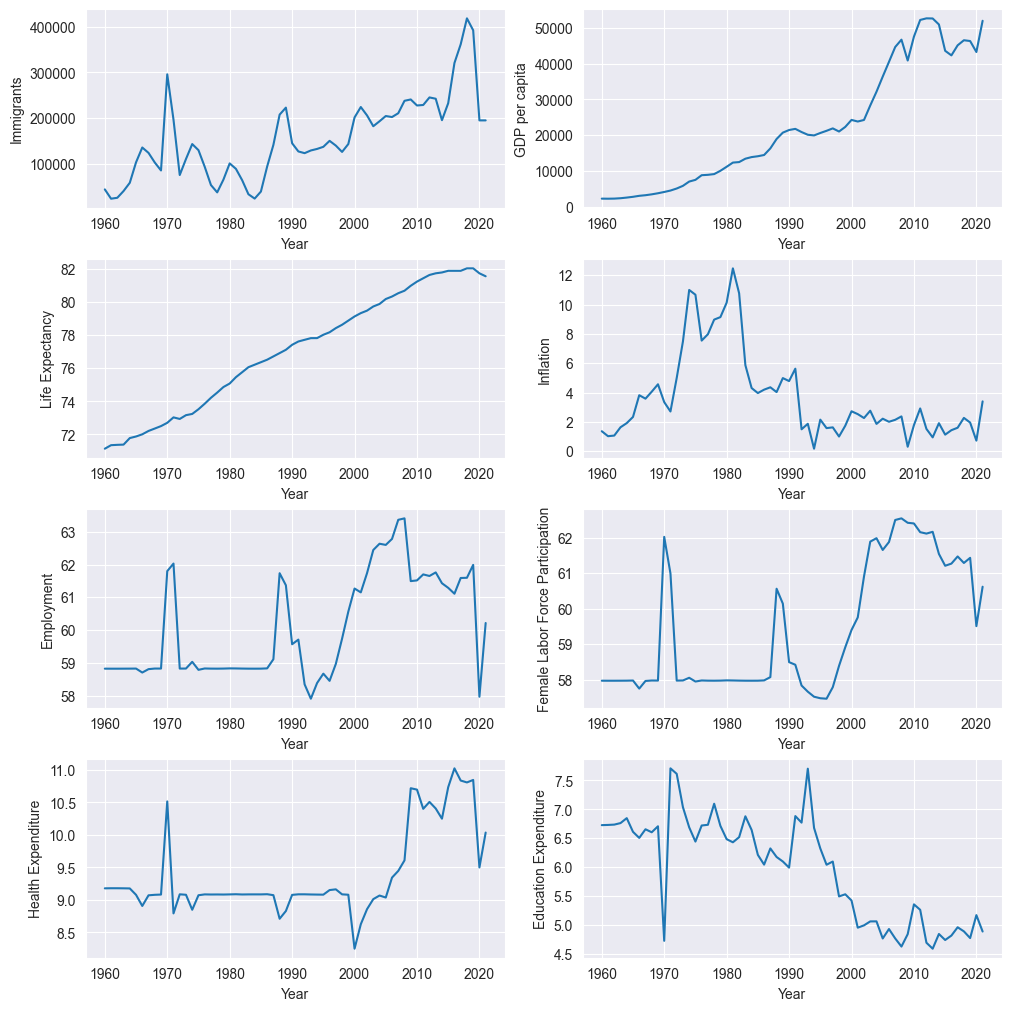

In [115]:
# Demonstrate trends in Canadian indicators.
fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True, figsize=(10,10))
sb.lineplot(data=dataset_full, x='Year', y='Immigrants', ax=axes[0,0]).set(xlabel='Year', ylabel='Immigrants')
sb.lineplot(data=dataset_full, x='Year', y='GDP', ax=axes[0,1]).set(xlabel='Year', ylabel='GDP per capita')
sb.lineplot(data=dataset_full, x='Year', y='LE', ax=axes[1,0]).set(xlabel='Year', ylabel='Life Expectancy')
sb.lineplot(data=dataset_full, x='Year', y='IF', ax=axes[1,1]).set(xlabel='Year', ylabel='Inflation')
sb.lineplot(data=dataset_full, x='Year', y='EM', ax=axes[2,0]).set(xlabel='Year', ylabel='Employment')
sb.lineplot(data=dataset_full, x='Year', y='FM', ax=axes[2,1]).set(xlabel='Year', ylabel='Female Labor Force Participation')
sb.lineplot(data=dataset_full, x='Year', y='HE', ax=axes[3,0]).set(xlabel='Year', ylabel='Health Expenditure')
sb.lineplot(data=dataset_full, x='Year', y='EDU', ax=axes[3,1]).set(xlabel='Year', ylabel='Education Expenditure')

<Axes: xlabel='Year', ylabel='Employment'>

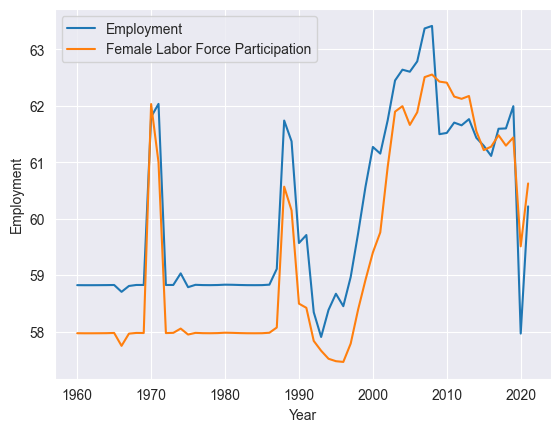

In [116]:
# Demonstrate the employment rate and female labor force participation rate.
sb.lineplot(data=dataset_full, x='Year', y='EM', label='Employment').set(xlabel='Year', ylabel='Employment')
sb.lineplot(data=dataset_full, x='Year', y='FM', label='Female Labor Force Participation')

<Axes: xlabel='Year', ylabel='Immigrants'>

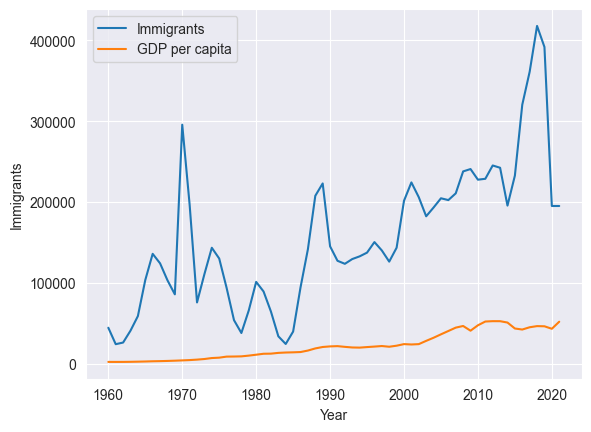

In [117]:
# Demonstrate the relationship between immigrants and GDP per capita.
sb.lineplot(data=dataset_full, x='Year', y='Immigrants', label='Immigrants').set(xlabel='Year', ylabel='Immigrants')
sb.lineplot(data=dataset_full, x='Year', y='GDP', label='GDP per capita')

<Axes: xlabel='Year', ylabel='Expenditure'>

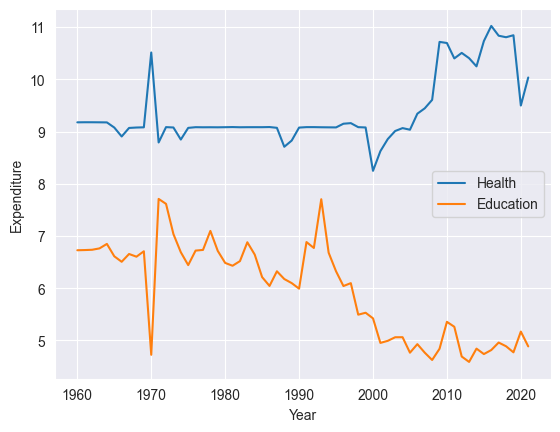

In [118]:
# Demonstrate the relationship between health expenditure and education expenditure.
sb.lineplot(data=dataset_full, x='Year', y='HE', label='Health').set(xlabel='Year', ylabel='Expenditure')
sb.lineplot(data=dataset_full, x='Year', y='EDU', label='Education')

<Axes: >

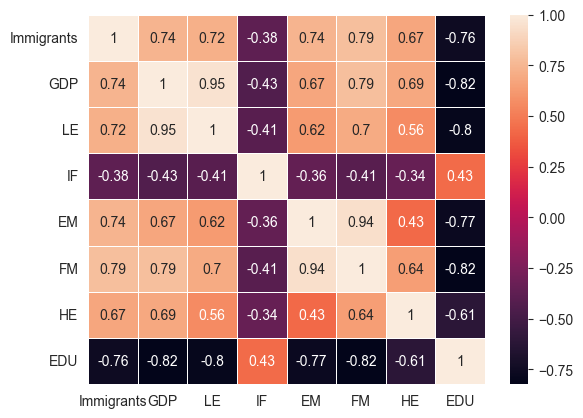

In [119]:
# Generate correlation coefficient heat map.
corr = dataset.corr(numeric_only=True)
sb.heatmap(corr, annot=True, linewidth=0.5)

In [120]:
# Binning the data, classify the data into three groups, high, medium and low, represented by 2,1,0 respectively.
dataset_bins = dataset.copy()
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
dataset_bins = est.fit_transform(dataset_bins)
dataset_bins = pd.DataFrame(dataset_bins, columns=['Immigrants', 'GDP', 'LE', 'IF', 'EM', 'FM', 'HE', 'EDU'])
dataset_bins.head()

,Immigrants,GDP,LE,IF,EM,FM,HE,EDU
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [121]:
dataset_bins.describe()

,Immigrants,GDP,LE,IF,EM,FM,HE,EDU
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.500000,0.806452,1.096774,0.403226,0.677419,0.741935,0.548387,0.903226
std,0.646555,0.846182,0.843678,0.688540,0.864115,0.922141,0.803219,0.843678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.000000,2.000000,1.000000,1.750000,2.000000,1.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


[Text(0.2857142857142857, 0.9, 'FM <= 0.5\ngini = 0.542\nsamples = 62\nvalue = [36, 21, 5]\nclass = Low'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Low'),
 Text(0.42857142857142855, 0.7, 'HE <= 1.5\ngini = 0.311\nsamples = 26\nvalue = [0, 21, 5]\nclass = Medium'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0]\nclass = Medium'),
 Text(0.5714285714285714, 0.5, 'EM <= 1.5\ngini = 0.486\nsamples = 12\nvalue = [0, 7, 5]\nclass = Medium'),
 Text(0.42857142857142855, 0.3, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = Medium'),
 Text(0.7142857142857143, 0.3, 'GDP <= 1.0\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = High'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = High'),
 Text(0.8571428571428571, 0.1, 'gini = 0.5\nsamples = 6\nvalue = [0, 3, 3]\nclass = Medium')]

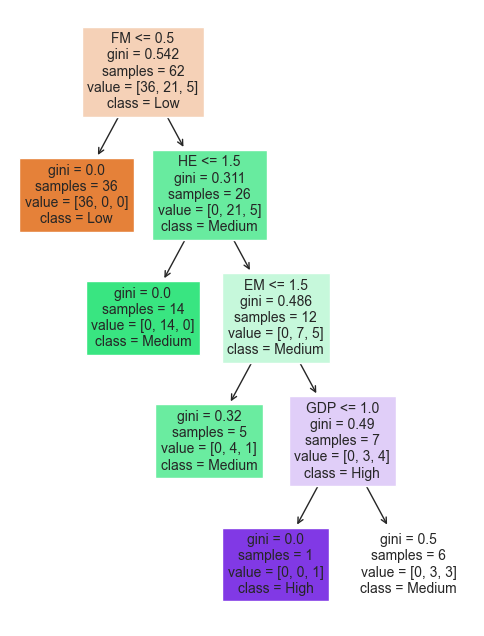

In [122]:
# Generate decision tree, find the most important influencing factors.
x_train = dataset_bins[['GDP', 'LE', 'IF', 'EM', 'FM', 'HE', 'EDU']]
y_train = dataset_bins[['Immigrants']]
dec = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
plt.figure(figsize=(6, 8))
plot_tree(dec, feature_names=['GDP', 'LE', 'IF', 'EM', 'FM', 'HE', 'EDU'], class_names=['Low', 'Medium','High'], fontsize=10, filled=True)

In [123]:
print(export_text(dec))

|--- feature_4 <= 0.50
|   |--- class: 0.0
|--- feature_4 >  0.50
|   |--- feature_5 <= 1.50
|   |   |--- class: 1.0
|   |--- feature_5 >  1.50
|   |   |--- feature_3 <= 1.50
|   |   |   |--- class: 1.0
|   |   |--- feature_3 >  1.50
|   |   |   |--- feature_0 <= 1.00
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_0 >  1.00
|   |   |   |   |--- class: 1.0



In [124]:
# Binarize the data for association rule mining.
dataset_string = dataset.copy()

biz = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
dataset_string = biz.fit_transform(dataset_string)

dataset_string = pd.DataFrame(dataset_string, columns=['Immigrants', 'GDP', 'LE', 'IF', 'EM', 'FM', 'HE', 'EDU'])
dataset_string = dataset_string.replace(to_replace=1, value=True)
dataset_string = dataset_string.replace(to_replace=0, value=False)
dataset_string.head()

,Immigrants,GDP,LE,IF,EM,FM,HE,EDU
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True


In [125]:
# Use the Apriori algorithm for association rule mining, minimum support threshold = 5%.
ap = apriori(dataset_string, min_support=0.05, use_colnames=True)
ap.head()

,support,itemsets
0,0.225806,(Immigrants)
1,0.306452,(GDP)
2,0.564516,(LE)
3,0.161290,(IF)
4,0.387097,(EM)


In [126]:
# Set minimum confidence threshold to 80%, sort by lift.
ar = association_rules(ap, metric="confidence", min_threshold=0.8)
ar.sort_values(by='lift', ascending=False, inplace=True)
ar.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
293,"(EM, FM, HE, LE)","(Immigrants, GDP)",0.177419,0.177419,0.16129,0.909091,5.123967,0.129813,9.048387
295,"(Immigrants, GDP, FM)","(LE, HE, EM)",0.177419,0.177419,0.16129,0.909091,5.123967,0.129813,9.048387
309,"(Immigrants, GDP)","(EM, FM, HE, LE)",0.177419,0.177419,0.16129,0.909091,5.123967,0.129813,9.048387
308,"(LE, HE, EM)","(Immigrants, GDP, FM)",0.177419,0.177419,0.16129,0.909091,5.123967,0.129813,9.048387
204,"(LE, HE, EM)","(Immigrants, GDP)",0.177419,0.177419,0.16129,0.909091,5.123967,0.129813,9.048387


In [127]:
# Filter the correlation consequents to immigrants.
ar[ar['consequents']==frozenset(['Immigrants'])].reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(FM, HE, EM)",(Immigrants),0.193548,0.225806,0.177419,0.916667,4.059524,0.133715,9.290323
1,"(HE, EM)",(Immigrants),0.193548,0.225806,0.177419,0.916667,4.059524,0.133715,9.290323
2,"(LE, HE, EM)",(Immigrants),0.177419,0.225806,0.161290,0.909091,4.025974,0.121228,8.516129
3,"(GDP, LE, HE, EM)",(Immigrants),0.177419,0.225806,0.161290,0.909091,4.025974,0.121228,8.516129
4,"(GDP, HE, EM)",(Immigrants),0.177419,0.225806,0.161290,0.909091,4.025974,0.121228,8.516129
5,"(GDP, FM, HE, EM)",(Immigrants),0.177419,0.225806,0.161290,0.909091,4.025974,0.121228,8.516129
6,"(EM, FM, HE, LE)",(Immigrants),0.177419,0.225806,0.161290,0.909091,4.025974,0.121228,8.516129
7,"(GDP, FM, LE, HE, EM)",(Immigrants),0.177419,0.225806,0.161290,0.909091,4.025974,0.121228,8.516129
8,(HE),(Immigrants),0.209677,0.225806,0.177419,0.846154,3.747253,0.130073,5.032258
9,"(FM, HE)",(Immigrants),0.209677,0.225806,0.177419,0.846154,3.747253,0.130073,5.032258


### End of Experiments.